# Supervised Machine Learning: Loan Payback Classification

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-06-04 01:44:28--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-06-04 01:44:29 (12.8 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object 

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2020.4.5.1-py36_0  --> 2020.4.5.1-py36_0 anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

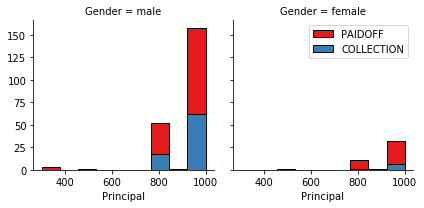

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

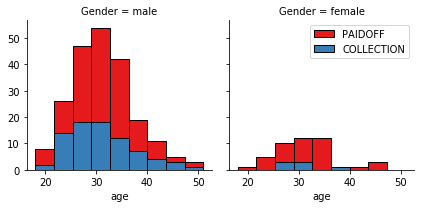

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

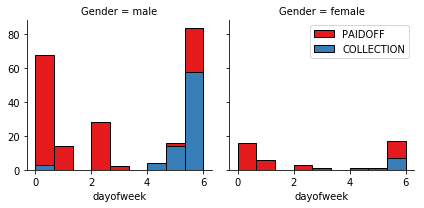

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [20]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [21]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [22]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

print("number of test samples:", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples: 104
number of training samples: 242


## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [23]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


# Classification 

Now, we use the training set to build an accurate model. Then use the test set to report the accuracy of the model
Our goal is to test and evaluate the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

# K Nearest Neighbor(KNN)

#### Building model using KNN, finding the best k and accuracy evaluation

Text(0, 0.5, 'Error Rate')

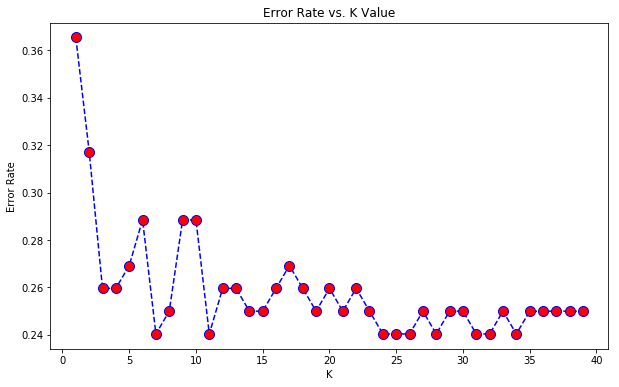

In [24]:
##Choosing a K Value
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7596153846153846 with k= 7


In [28]:
##Create a KNN Model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

In [29]:
print(knn.score(X_test,y_test))

0.7596153846153846


In [30]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn.predict(X_test)))

Train set Accuracy:  0.8099173553719008
Test set Accuracy:  0.7596153846153846


In [31]:
# KNN f1_score
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test,knn_pred, average='weighted')
print('KNN F1-score: ', knn_f1) 

# KNN jaccard Index
from sklearn.metrics import jaccard_similarity_score
knn_jaccard = jaccard_similarity_score(y_test, knn_pred)
print('KNN Jaccard: ', knn_jaccard)

KNN F1-score:  0.7214319582740636
KNN Jaccard:  0.7596153846153846


# Decision Tree

#### Building model using Decision Tree, and evaluate accuracy

In [32]:
##Create a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train,y_train)
print(dtree.score(X_test,y_test))

0.6538461538461539


In [33]:
##Predictions
dtree_pred = dtree.predict(X_test)

In [34]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, dtree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, dtree.predict(X_test)))

Train set Accuracy:  0.9008264462809917
Test set Accuracy:  0.6538461538461539


In [35]:
# Decision Tree f1_score
from sklearn.metrics import f1_score
dtree_f1 = f1_score(y_test,dtree_pred, average='weighted')
print('Decision Tree F1-score: ', dtree_f1 )

# Decision Tree jaccard Index
from sklearn.metrics import jaccard_similarity_score
dtree_jaccard = jaccard_similarity_score(y_test, dtree_pred)
print('Decision Tree Jaccard: ', dtree_jaccard)

Decision Tree F1-score:  0.658008658008658
Decision Tree Jaccard:  0.6538461538461539


# Support Vector Machine

#### Building model using SVM, and evaluate accuracy

In [59]:
##Create a Support Vector Machine Model
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [60]:
##Create a Grid Search
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [61]:
grid.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7530864197530864, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7530864197530864, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7530864197530864, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7530864197530864, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [62]:
print(grid.score(X_test,y_test))

0.75


In [63]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [64]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
##Predictions
grid_predictions = grid.predict(X_test)

In [66]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, grid.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, grid.predict(X_test)))

Train set Accuracy:  0.7520661157024794
Test set Accuracy:  0.75


In [67]:
# SVM f1_score
from sklearn.metrics import f1_score
svm_f1 = f1_score(y_test,grid_predictions, average='weighted')
print('SVM F1-score: ', svm_f1 )

# SVM jaccard Index
from sklearn.metrics import jaccard_similarity_score
svm_jaccard = jaccard_similarity_score(y_test, grid_predictions)
print('SVM Jaccard: ', svm_jaccard )

SVM F1-score:  0.6428571428571428
SVM Jaccard:  0.75


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic Regression

#### Building model using Logistic Regression, and evaluate accuracy

In [45]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
print(logmodel.score(X_test,y_test))

0.7307692307692307


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
logmodelpred_prob = logmodel.predict_proba(X_test)

In [47]:
logmodelpred = logmodel.predict(X_test)

In [48]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, logmodel.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, logmodel.predict(X_test)))

Train set Accuracy:  0.7603305785123967
Test set Accuracy:  0.7307692307692307


In [49]:
# Logistic Regression f1_score
from sklearn.metrics import f1_score
lr_f1 = f1_score(y_test,logmodelpred, average='weighted')
print('Logistic Regression F1-score: ', lr_f1 )

# Logistic Regression jaccard Index
from sklearn.metrics import jaccard_similarity_score
lr_jaccard = jaccard_similarity_score(y_test, logmodelpred)
print('Logistic Regression Jaccard: ', lr_jaccard)

# Logistic Regression LogLoss

from sklearn.metrics import log_loss
lr_logloss = log_loss(y_test, logmodelpred_prob)
print('Logistic Regression LogLoss: ', lr_logloss)

Logistic Regression F1-score:  0.6333333333333333
Logistic Regression Jaccard:  0.7307692307692307
Logistic Regression LogLoss:  0.4002373127106363


# Model Evaluation using Test set

In [50]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [51]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-06-04 01:51:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-06-04 01:51:10 (370 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [52]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [53]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [54]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [55]:
test_df_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_df_Feature = pd.concat([test_df_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_df_Feature.drop(['Master or Above'], axis = 1,inplace=True)

test_df_X = test_df_Feature.copy()
test_df_y = test_df['loan_status'].values
test_df_X= scaler.transform(test_df_X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


#### Make predictions with the KNN model

In [56]:
knn_pred_test = knn.predict(test_df_X)

# KNN f1_score
from sklearn.metrics import f1_score
knn_f1 = f1_score(test_df_y,knn_pred_test, average='weighted')
print('KNN F1-score: ', knn_f1) 

# KNN jaccard Index
from sklearn.metrics import jaccard_similarity_score
knn_jaccard = jaccard_similarity_score(test_df_y, knn_pred_test)
print('KNN Jaccard: ', knn_jaccard)

KNN F1-score:  0.6212664277180406
KNN Jaccard:  0.7222222222222222


#### Make predictions with the Decision Tree model

In [57]:
dtree_pred_test = dtree.predict(test_df_X)

# Decision Tree f1_score
from sklearn.metrics import f1_score
dtree_f1 = f1_score(test_df_y,dtree_pred_test, average='weighted')
print('Decision Tree F1-score: ', dtree_f1 )

# Decision Tree jaccard Index
from sklearn.metrics import jaccard_similarity_score
dtree_jaccard = jaccard_similarity_score(test_df_y, dtree_pred_test)
print('Decision Tree Jaccard: ', dtree_jaccard)

Decision Tree F1-score:  0.7105756358768406
Decision Tree Jaccard:  0.7222222222222222


#### Make predictions with the Support Vector Machines model

In [68]:
grid_predictions_test = grid.predict(test_df_X)

#SVM f1_score
from sklearn.metrics import f1_score
svm_f1 = f1_score(test_df_y,grid_predictions_test, average='weighted')
print('SVM F1-score: ', svm_f1 )

# SVM jaccard Index
from sklearn.metrics import jaccard_similarity_score
svm_jaccard = jaccard_similarity_score(test_df_y, grid_predictions_test)
print('SVM Jaccard: ', svm_jaccard )

SVM F1-score:  0.6304176516942475
SVM Jaccard:  0.7407407407407407


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Make predictions with the Logistic Regression model

In [69]:
logmodelpred_prob_test = logmodel.predict_proba(test_df_X)
logmodelpred_test = logmodel.predict(test_df_X)

# Logistic Regression f1_score
from sklearn.metrics import f1_score
lr_f1 = f1_score(test_df_y,logmodelpred_test, average='weighted')
print('Logistic Regression F1-score: ', lr_f1 )

# Logistic Regression jaccard Index
from sklearn.metrics import jaccard_similarity_score
lr_jaccard = jaccard_similarity_score(test_df_y, logmodelpred_test)
print('Logistic Regression Jaccard: ', lr_jaccard)

# Logistic Regression LogLoss

from sklearn.metrics import log_loss
lr_logloss = log_loss(test_df_y, logmodelpred_prob_test)
print('Logistic Regression LogLoss: ', lr_logloss)

Logistic Regression F1-score:  0.6304176516942475
Logistic Regression Jaccard:  0.7407407407407407
Logistic Regression LogLoss:  0.48676268985703175


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Results

In [78]:
report = {
    'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'],
    'Jaccard': [knn_jaccard, dtree_jaccard, svm_jaccard, lr_jaccard],
    'F1-score': [knn_f1, dtree_f1, svm_f1, lr_f1],
    'LogLoss': ['NA', 'NA', 'NA', lr_logloss]
}
report_df = pd.DataFrame(report)
report_df

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.722222,0.621266,NA
1,Decision Tree,0.722222,0.710576,NA
2,SVM,0.740741,0.630418,NA
3,LogisticRegression,0.740741,0.630418,0.486763
